

<h1 style="font-family:verdana">
 💻 🧑 NER🧑 💻


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, Masking,LSTM, Dense,Bidirectional, GRU ,AveragePooling1D, MaxPooling1D ,GlobalMaxPooling1D, Dropout, Conv1D, Conv2D, GlobalAveragePooling1D, LayerNormalization #Remove
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt


<h1><a name="section-one"> 1. Inspecció del conjunt de dades </a></h1>

In [ ]:
!pip install gdown
!gdown "https://drive.google.com/uc?id=1NC5gHjrR5ysjrRMeJYvE6v7pxeuSPLs3"
!tar -zxf nlu_data.tar.gz

Downloading...
From: https://drive.google.com/uc?id=1NC5gHjrR5ysjrRMeJYvE6v7pxeuSPLs3
To: /content/nlu_data.tar.gz
100% 4.51M/4.51M [00:00<00:00, 286MB/s]




*   **B** - Beginning: primer token d'una entitat.
*   **I** - Inside: token dins d'una entitat.
*   **L** - Last: últim token de l'entitat.
*   **O** - Outside: token que no pertany a cap entitat.
*   **U** - Unit: entitats d'un sol token


---

 <h1><a name="ex-one"><center> ✏ Task 1 ✏</a></h1>


In [ ]:
#TODO
train_data = pd.read_csv('data/mini_train.csv', header=None)
val_data = pd.read_csv('data/validation.csv', header=None)
test_data = pd.read_csv('data/test.csv', header=None)

print('Training size:', len(train_data))
print('Validation dataset size:', len(val_data))
print('Test dataset size:', len(test_data))

Training size: 25000
Validation dataset size: 8058
Test dataset size: 336


---

 <h1><a name="ex-two"><center> ✏ Task 2 ✏</a></h1>

In [ ]:
#TODO
_train_sentences = list(train_data[0])
train_labels = list(train_data[1])

_val_sentences = list(val_data[0])
val_labels = list(val_data[1])

_test_sentences = list(test_data[0])
test_labels = list(test_data[1])

---

Si tot ha anat bé ja podem analitzar quin aspecte té el format BILOU.

<h1><a name="section-two"> 2. Data Processing </a></h1>

---

 <h1><a name="ex-three"><center> ✏ Task 3 ✏</a></h1>


 1. El primer pas serà construir el vocabulari a partir de les paraules presents a les oracions d'entrenament.

2. El segon pas serà convertir les oracions en seqüències de nombres enters usant el tokenitzador.

3. El tercer pas serà guardar la longitud original de cada oració. Això ens serà útil per avaluar el nostre model sense tenir en compte el *padding*.

3. Finalment, per aconseguir que totes les seqüències tinguen la mateixa longitud, fixarem la longitud segons la màxima trobada a l'entrenament i afegirem zeros a les oracions de menor longitud.

* <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer"> Tokenizer </a>
* <a href="https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences"> Pad Sequences </a>




In [ ]:
import re
def process_strings(strings, special_chars):
    unk_token = 'OOV'
    part_sentences = []

    for s in strings:
      s_split = s.split()
      for i in range(len(s_split)):
        if s_split[i] in special_chars:
          s_split[i] = unk_token

      s_new = ' '.join(s_split)
      part_sentences.append(s_new)
    return part_sentences

In [ ]:
# Example usage
special_characters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

train_sentences = process_strings(_train_sentences, special_characters)
val_sentences = process_strings(_val_sentences, special_characters)
test_sentences = process_strings(_test_sentences, special_characters)

print(_train_sentences[8])
print(train_sentences[8])

alguna que sea similar a anti matter en movistar +
alguna que sea similar a anti matter en movistar OOV


In [ ]:
print(train_labels[8])


O O O O O B-tef.audiovisual_content_title L-tef.audiovisual_content_title O B-tef.entity.proveedor L-tef.entity.proveedor


In [ ]:
tokenizer = Tokenizer(oov_token='OOV', filters = '') # token per unknown words
tokenizer.fit_on_texts(train_sentences)

# Train
train_sequences = tokenizer.texts_to_sequences(train_sentences)
max_sequence_length = max(map(len, train_sequences))
len_train_sequences = [len(seq) for seq in train_sequences]
train_pad_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding = "post")

print(train_sentences[24])
print(train_sequences[24])
print(max_sequence_length)
print(train_pad_sequences[0])
print(train_labels[24])

la show de joo ye-bin
[3, 73, 2, 3185, 3186]
19
[1839 1312  199  242    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
O U-tef.entity.tipoContenido O B-tef.audiovisual_person L-tef.audiovisual_person


In [ ]:
# Val
val_sequences = tokenizer.texts_to_sequences(val_sentences)
len_val_sequences = [len(seq) for seq in val_sequences]
val_pad_sequences = pad_sequences(val_sequences, maxlen=max_sequence_length, padding = "post")

print(val_sentences[0])
print(val_sequences[0])
print(val_pad_sequences[0])
print(val_labels[0])

me gustaria ver alguna capitulo de netflix
[4, 22, 6, 8, 39, 2, 88]
[ 4 22  6  8 39  2 88  0  0  0  0  0  0  0  0  0  0  0  0]
O O O O U-tef.entity.tipoContenido O U-tef.entity.proveedor


In [ ]:
# Test
test_sequences = tokenizer.texts_to_sequences(test_sentences)
len_test_sequences = [len(seq) for seq in test_sequences]
test_pad_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding = "post")
print(test_sentences[0])
print(test_sequences[0])
print(test_pad_sequences[0])
print(test_labels[0])

danny devito
[5271, 1]
[5271    1    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
B-tef.audiovisual_person L-tef.audiovisual_person



---



---

 <h1><a name="ex-four"><center> ✏ Task 4 ✏</a></h1>


 * <a href=https://www.tensorflow.org/guide/keras/understanding_masking_and_padding> Masking and Padding </a>

 * <a href=https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical> To Categorical </a>




In [ ]:
#TODO

from collections import Counter

#Step 1
def count_unique_entities(list_of_label_sentences):
    x = []
    for i in list_of_label_sentences:
      split_i = i.split()
      x.extend(split_i)
    freq = Counter(x)
    unique_entities = list(freq.keys())
    return len(unique_entities), unique_entities

num_unique_entities, unique_entities = count_unique_entities(train_labels)

print("Number of different entities:", num_unique_entities)
print("Unique entities:", unique_entities)

Number of different entities: 38
Unique entities: ['B-tef.audiovisual_person', 'L-tef.audiovisual_person', 'O', 'U-tef.entity.tipoContenido', 'U-tef.entity.genero', 'B-tef.audiovisual_content_title', 'L-tef.audiovisual_content_title', 'B-tef.entity.proveedor', 'L-tef.entity.proveedor', 'U-tef.audiovisual_content_title', 'I-tef.audiovisual_content_title', 'U-tef.entity.proveedor', 'B-tef.entity.conQuien', 'L-tef.entity.conQuien', 'I-tef.entity.proveedor', 'U-tef.entity.cast', 'B-tef.entity.keyword', 'L-tef.entity.keyword', 'B-tef.entity.genero', 'L-tef.entity.genero', 'B-tef.entity.productora', 'I-tef.entity.productora', 'L-tef.entity.productora', 'I-tef.entity.keyword', 'B-tef.entity.cast', 'I-tef.entity.cast', 'L-tef.entity.cast', 'U-tef.entity.conQuien', 'U-tef.entity.favoritos', 'I-tef.audiovisual_person', 'I-tef.entity.conQuien', 'U-tef.entity.productora', 'U-tef.entity.keyword', 'B-tef.entity.favoritos', 'I-tef.entity.favoritos', 'L-tef.entity.favoritos', 'I-tef.entity.genero', 'U

In [ ]:
#Step 2
pad_unique_entities = ['<pad>']
pad_unique_entities.extend(unique_entities)
num_unique_entities += 1
print(pad_unique_entities)
label_encoder = LabelEncoder().fit(pad_unique_entities)
label_to_index = {label: index for index, label in enumerate(label_encoder.classes_)}
print(label_to_index)

# Train labels with padding
train_numerical_labels = [label_encoder.transform(sent.split()) for sent in train_labels]
train_pad_labels = pad_sequences(train_numerical_labels, maxlen=max_sequence_length, padding = "post")

def remove_sentences(list_labels, list_sequences):
  idx_to_remove = []
  for idx, labels in enumerate(list_labels):
    for label in labels:
      if label == 'U-tef.entity.review':
        idx_to_remove.append(idx)

  labels = [elem for i, elem in enumerate(list_labels) if i not in idx_to_remove]
  sequences = [elem for i, elem in enumerate(list_sequences) if i not in idx_to_remove]
  return labels, np.array(sequences)

# Test labels with padding
_test_labels = [label.split() for label in test_labels]
test_labels, test_pad_sequences = remove_sentences(_test_labels, test_pad_sequences)
test_numerical_labels = [label_encoder.transform(sent) for sent in test_labels]
test_pad_labels = pad_sequences(test_numerical_labels, maxlen=max_sequence_length, padding = "post")

# Val labels with padding
val_numerical_labels =[label_encoder.transform(sent.split()) for sent in val_labels]
val_pad_labels = pad_sequences(val_numerical_labels, maxlen=max_sequence_length, padding = "post")


['<pad>', 'B-tef.audiovisual_person', 'L-tef.audiovisual_person', 'O', 'U-tef.entity.tipoContenido', 'U-tef.entity.genero', 'B-tef.audiovisual_content_title', 'L-tef.audiovisual_content_title', 'B-tef.entity.proveedor', 'L-tef.entity.proveedor', 'U-tef.audiovisual_content_title', 'I-tef.audiovisual_content_title', 'U-tef.entity.proveedor', 'B-tef.entity.conQuien', 'L-tef.entity.conQuien', 'I-tef.entity.proveedor', 'U-tef.entity.cast', 'B-tef.entity.keyword', 'L-tef.entity.keyword', 'B-tef.entity.genero', 'L-tef.entity.genero', 'B-tef.entity.productora', 'I-tef.entity.productora', 'L-tef.entity.productora', 'I-tef.entity.keyword', 'B-tef.entity.cast', 'I-tef.entity.cast', 'L-tef.entity.cast', 'U-tef.entity.conQuien', 'U-tef.entity.favoritos', 'I-tef.audiovisual_person', 'I-tef.entity.conQuien', 'U-tef.entity.productora', 'U-tef.entity.keyword', 'B-tef.entity.favoritos', 'I-tef.entity.favoritos', 'L-tef.entity.favoritos', 'I-tef.entity.genero', 'U-tef.audiovisual_person']
{'<pad>': 0, 'B

In [ ]:
#Step 3
train_labels_one_hot = to_categorical(train_pad_labels, num_unique_entities)
test_labels_one_hot = to_categorical(test_pad_labels, num_unique_entities)
val_labels_one_hot = to_categorical(val_pad_labels, num_unique_entities)


In [ ]:
print(train_pad_labels[0])
print(train_labels_one_hot[0])
print(train_pad_sequences[0])

[ 2 20 28 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.

<h1><a name="section-three"> 3. Design and Model Training </a></h1>

---
<h1><a name="ex-five"><center> ✏ Task 5 ✏</a></h1>



In [ ]:
#Transformer classes
class TransformerBlock(keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.ffn = keras.Sequential(
            [
                keras.layers.Dense(ff_dim, activation="relu"),
                keras.layers.Dense(embed_dim),
            ]
        )
        self.layernorm1 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = keras.layers.Dropout(rate)
        self.dropout2 = keras.layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


class TokenAndPositionEmbedding(keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = keras.layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.pos_emb = keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, inputs):
        maxlen = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        position_embeddings = self.pos_emb(positions)
        token_embeddings = self.token_emb(inputs)
        return token_embeddings + position_embeddings




Fixem les seeds per poder tenir reproducibiltat als experiments.

In [ ]:
from numpy.random import seed
keras.utils.set_random_seed(812)
seed(1)


Function to plot training and validation loss:

In [ ]:

def plot_training_curve(history):
    # Plot the training and validation loss
    fig, ax = plt.subplots()
    ax.plot(history.history['loss'], label='train_loss')
    ax.plot(history.history['val_loss'], label='val_loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('Training and Validation Loss')
    ax.grid(True)
    ax.legend()

In [ ]:
# Baseline Model amb Transformer
embedding_dim = 64
vocab_size = len(tokenizer.word_index) + 1

num_heads = 2  # Number of attention heads
ff_dim = 32

model = Sequential()
model.add(TokenAndPositionEmbedding(max_sequence_length,vocab_size,embedding_dim))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim))
model.add(Dense(64,activation="relu"))
model.add(Dense(num_unique_entities, activation='softmax')) # output layer
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 10

history = model.fit(train_pad_sequences, train_labels_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(val_pad_sequences, val_labels_one_hot))

Epoch 1/10
196/196 [==============================] - 39s 131ms/step - loss: 0.3123 - accuracy: 0.9292 - val_loss: 0.1256 - val_accuracy: 0.9625
Epoch 2/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0692 - accuracy: 0.9786 - val_loss: 0.0984 - val_accuracy: 0.9692
Epoch 3/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0382 - accuracy: 0.9875 - val_loss: 0.0896 - val_accuracy: 0.9745
Epoch 4/10
196/196 [==============================] - 3s 16ms/step - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0822 - val_accuracy: 0.9773
Epoch 5/10
196/196 [==============================] - 4s 19ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0782 - val_accuracy: 0.9789
Epoch 6/10
196/196 [==============================] - 2s 11ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0779 - val_accuracy: 0.9805
Epoch 7/10
196/196 [==============================] - 3s 14ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0850 - val_accuracy: 0.98

Com ja sabeu, NER és una tasca on les dades estan molt desbalancejades. La gran majoria de les nostres etiquetes seran 'O' (*outside*). Es pot donar el cas on el model tinga una *accuracy* molt alta predient sempre 'O'.

Per mesurar millor com de bo és el nostre model, calcularem el F1 score per cada classe, així com la mitjana (*macro average*). Quan prepareu el vostre document, heu de reportar aquesta mitjana com a mètrica del vostre model, no l'*accuracy*.

252/252 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       0.77      0.71      0.74      1582
           2       0.51      0.52      0.51       329
           3       1.00      1.00      1.00       131
           4       0.95      1.00      0.97       432
           5       0.98      1.00      0.99        48
           6       1.00      0.97      0.98        59
           7       0.55      0.37      0.44        57
           8       0.99      1.00      1.00       110
           9       0.98      0.99      0.99       535
          10       0.87      0.75      0.80      2512
          11       0.37      0.21      0.26        34
          12       1.00      0.98      0.99       131
          13       1.00      1.00      1.00        42
          14       1.00      1.00      1.00        48
          15       1.00      0.92      0.96        12
          16       0.38   

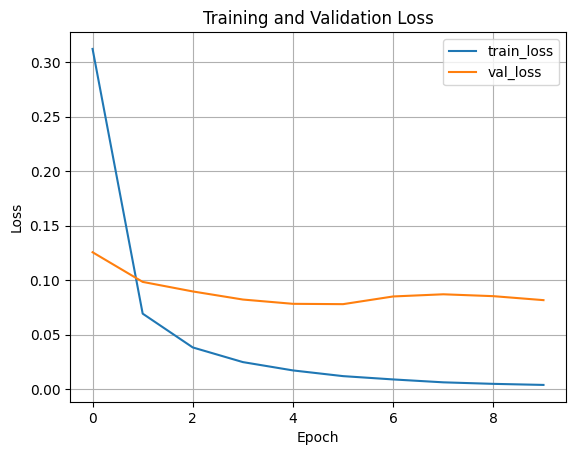

In [ ]:
def preds_to_index(preds, seq_lens):
  '''
  Turn predictions to numerical indexes, flatten the sentences and discard padding.
  '''
  idx_preds = []
  for pred, seq_len in zip(preds,seq_lens):
      for l in range(seq_len):
        idx_preds.append(np.argmax(pred[l]))
  return idx_preds

preds = model.predict(val_pad_sequences)
val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(preds, len_val_sequences)

print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))
plot_training_curve(history)
print(model.summary())

A continuació podeu veure algunes prediccions del model.

In [ ]:
probs = model.predict(val_pad_sequences)
_predicted_labels = np.argmax(probs, axis=2)

predicted_labels = [list(label_encoder.inverse_transform(label)) for label in _predicted_labels]

for i in range(0, 1):
    print('Sentence: ', val_sentences[i])
    print('Original label: ', val_labels[i])
    print('Predicted label: ', predicted_labels[i][0:len_val_sequences[i]])
    print()

252/252 [==============================] - 1s 4ms/step
Sentence:  me gustaria ver alguna capitulo de netflix
Original label:  O O O O U-tef.entity.tipoContenido O U-tef.entity.proveedor
Predicted label:  ['O', 'O', 'O', 'O', 'U-tef.entity.tipoContenido', 'O', 'U-tef.entity.proveedor']



---

 <h1><a name="ex-six"><center> ✏ Task 6 ✏ </a></h1>

 1. **Embeddings size.**

 2. **CNNs.**

 3. **RNNs.**  

 4. **Transformers.**

 5. **Regularitzation.**

 6. **Data Balance.**

 ---

Epoch 1/10
196/196 [==============================] - 14s 46ms/step - loss: 0.2188 - accuracy: 0.9456 - val_loss: 0.1023 - val_accuracy: 0.9677
Epoch 2/10
196/196 [==============================] - 4s 21ms/step - loss: 0.0491 - accuracy: 0.9842 - val_loss: 0.0764 - val_accuracy: 0.9765
Epoch 3/10
196/196 [==============================] - 3s 14ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0694 - val_accuracy: 0.9806
Epoch 4/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.0630 - val_accuracy: 0.9827
Epoch 5/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0618 - val_accuracy: 0.9837
Epoch 6/10
196/196 [==============================] - 3s 14ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0624 - val_accuracy: 0.9843
Epoch 7/10
196/196 [==============================] - 2s 12ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0662 - val_accuracy: 0.984

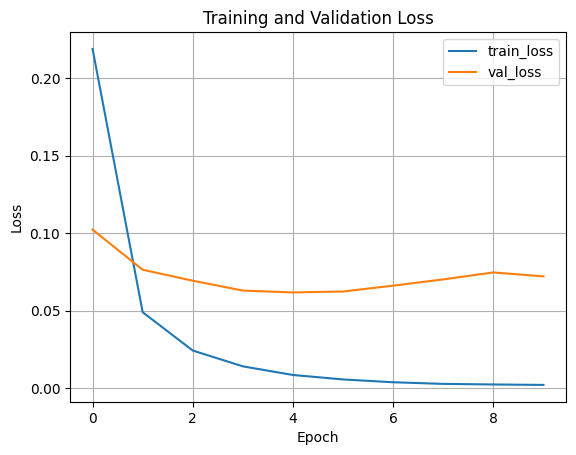

In [ ]:
#TASK 1: Embeddings size
embedding_dim = 128
vocab_size = len(tokenizer.word_index) + 1

num_heads = 2  # Number of attention heads
ff_dim = 32

model = Sequential()
model.add(TokenAndPositionEmbedding(max_sequence_length,vocab_size,embedding_dim))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim))
model.add(Dense(64,activation="relu"))
model.add(Dense(num_unique_entities, activation='softmax')) # output layer
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 10

history = model.fit(train_pad_sequences, train_labels_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(val_pad_sequences, val_labels_one_hot))

# Miramos F1 score macro sin tener en cuenta las predicciones en padding.
preds = model.predict(val_pad_sequences)
val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(preds, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

plot_training_curve(history)
print(model.summary())

Epoch 1/10
196/196 [==============================] - 12s 46ms/step - loss: 0.7714 - accuracy: 0.9117 - val_loss: 0.1540 - val_accuracy: 0.9588
Epoch 2/10
196/196 [==============================] - 3s 13ms/step - loss: 0.0608 - accuracy: 0.9846 - val_loss: 0.0723 - val_accuracy: 0.9837
Epoch 3/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0161 - accuracy: 0.9963 - val_loss: 0.0635 - val_accuracy: 0.9871
Epoch 4/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0608 - val_accuracy: 0.9870
Epoch 5/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0643 - val_accuracy: 0.9865
Epoch 6/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0677 - val_accuracy: 0.9866
Epoch 7/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0708 - val_accuracy: 0.9871

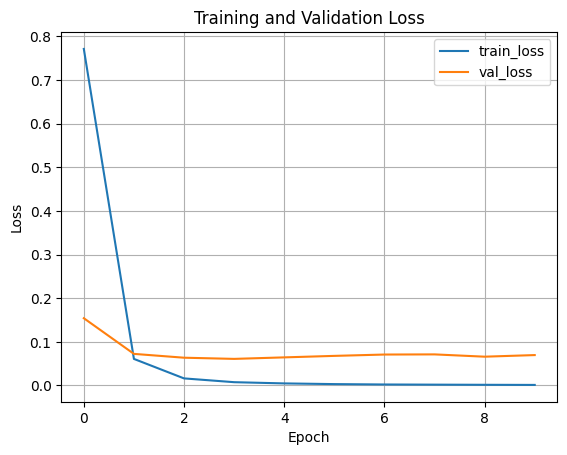

In [ ]:
# TASK 2: CNNs

embedding_dim = 128
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
# mask_zero ignore padding
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, mask_zero=True))
model.add(Conv1D(32,4,activation = "relu",padding = 'same'))
model.add(Conv1D(16,3,activation = "relu",padding = 'same'))
model.add(Dense(64,activation="relu")) #layer 3
model.add(Dense(num_unique_entities, activation='softmax')) # output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 10
history = model.fit(train_pad_sequences, train_labels_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(val_pad_sequences, val_labels_one_hot))

# Miramos F1 score macro sin tener en cuenta las predicciones en padding.

preds = model.predict(val_pad_sequences)
val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(preds, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

preds = model.predict(test_pad_sequences)
test_labels_idx = preds_to_index(test_labels_one_hot,len_test_sequences)
preds_idx = preds_to_index(preds, len_test_sequences)
print(classification_report(test_labels_idx, preds_idx, zero_division=1.0))

plot_training_curve(history)
print(model.summary())

Epoch 1/10
196/196 [==============================] - 23s 69ms/step - loss: 1.0601 - accuracy: 0.7837 - val_loss: 0.4269 - val_accuracy: 0.8854
Epoch 2/10
196/196 [==============================] - 5s 25ms/step - loss: 0.1675 - accuracy: 0.9568 - val_loss: 0.2287 - val_accuracy: 0.9463
Epoch 3/10
196/196 [==============================] - 4s 23ms/step - loss: 0.0505 - accuracy: 0.9883 - val_loss: 0.1846 - val_accuracy: 0.9589
Epoch 4/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0228 - accuracy: 0.9951 - val_loss: 0.1836 - val_accuracy: 0.9627
Epoch 5/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0116 - accuracy: 0.9980 - val_loss: 0.1918 - val_accuracy: 0.9618
Epoch 6/10
196/196 [==============================] - 5s 23ms/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.1954 - val_accuracy: 0.9627
Epoch 7/10
196/196 [==============================] - 3s 17ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.2104 - val_accuracy: 0.961

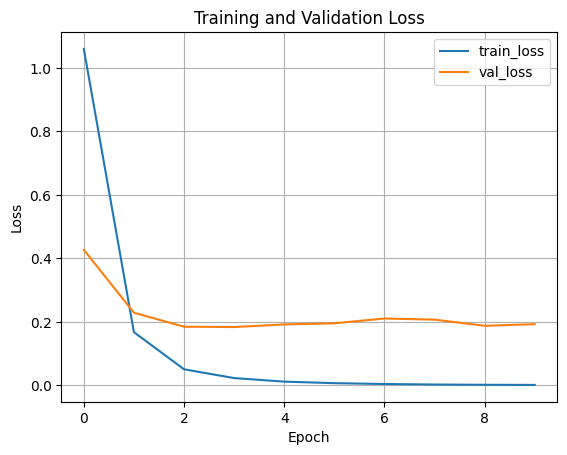

In [ ]:
##TASK 3: RNNs (LSTMS i GRU)

embedding_dim = 128
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
# mask_zero ignore padding
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, mask_zero=True))
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Dense(64,activation="relu")) #layer 3
model.add(Dense(num_unique_entities, activation='softmax')) # output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 10
history = model.fit(train_pad_sequences, train_labels_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(val_pad_sequences, val_labels_one_hot))

# Miramos F1 score macro sin tener en cuenta las predicciones en padding.

preds = model.predict(val_pad_sequences)
val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(preds, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

preds = model.predict(test_pad_sequences)
test_labels_idx = preds_to_index(test_labels_one_hot,len_test_sequences)
preds_idx = preds_to_index(preds, len_test_sequences)
print(classification_report(test_labels_idx, preds_idx, zero_division=1.0))

plot_training_curve(history)
print(model.summary())

Epoch 1/10
196/196 [==============================] - 25s 75ms/step - loss: 0.2356 - accuracy: 0.9428 - val_loss: 0.1114 - val_accuracy: 0.9737
Epoch 2/10
196/196 [==============================] - 9s 45ms/step - loss: 0.0289 - accuracy: 0.9922 - val_loss: 0.0657 - val_accuracy: 0.9871
Epoch 3/10
196/196 [==============================] - 9s 44ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0639 - val_accuracy: 0.9894
Epoch 4/10
196/196 [==============================] - 9s 45ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0648 - val_accuracy: 0.9888
Epoch 5/10
196/196 [==============================] - 8s 42ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0706 - val_accuracy: 0.9892
Epoch 6/10
196/196 [==============================] - 8s 40ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0678 - val_accuracy: 0.9893
Epoch 7/10
196/196 [==============================] - 8s 43ms/step - loss: 8.7325e-04 - accuracy: 0.9998 - val_loss: 0.0641 - val_accuracy: 0

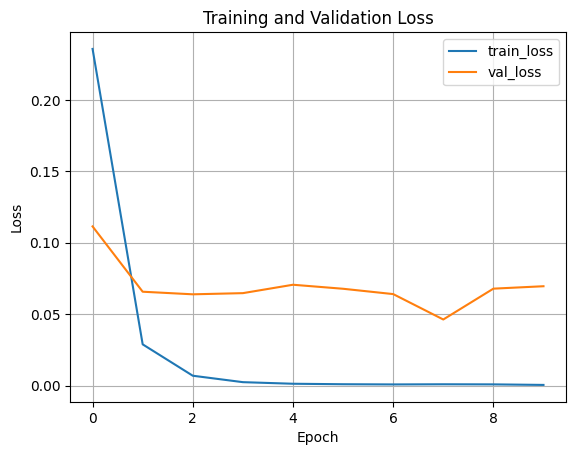

In [ ]:
##TASK 4: Transformers

embedding_dim = 256
vocab_size = len(tokenizer.word_index) + 1

num_heads = 4  # Number of attention heads
ff_dim = 32

ff_dim_2 = 64

model = Sequential()
model.add(TokenAndPositionEmbedding(max_sequence_length,vocab_size,embedding_dim))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim_2))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim_2))
model.add(Dense(64,activation="relu")) #layer 3
model.add(Dense(num_unique_entities, activation='softmax')) # output layer
model.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate = 0.0005), metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 10
history = model.fit(train_pad_sequences, train_labels_one_hot, epochs=epochs, batch_size=batch_size,
                    validation_data=(val_pad_sequences, val_labels_one_hot))

# Miramos F1 score macro sin tener en cuenta las predicciones en padding.
preds = model.predict(val_pad_sequences)
val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(preds, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

preds = model.predict(test_pad_sequences)
test_labels_idx = preds_to_index(test_labels_one_hot,len_test_sequences)
preds_idx = preds_to_index(preds, len_test_sequences)
print(classification_report(test_labels_idx, preds_idx, zero_division=1.0))

plot_training_curve(history)
print(model.summary())

**TASK 5:** afegim dropout als nostres models que començaven a fer overfitting

Epoch 1/7
196/196 [==============================] - 33s 85ms/step - loss: 0.2725 - accuracy: 0.9354 - val_loss: 0.1045 - val_accuracy: 0.9701
Epoch 2/7
196/196 [==============================] - 9s 46ms/step - loss: 0.0551 - accuracy: 0.9831 - val_loss: 0.0707 - val_accuracy: 0.9836
Epoch 3/7
196/196 [==============================] - 13s 65ms/step - loss: 0.0232 - accuracy: 0.9932 - val_loss: 0.0623 - val_accuracy: 0.9870
Epoch 4/7
196/196 [==============================] - 9s 44ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.0562 - val_accuracy: 0.9874
Epoch 5/7
196/196 [==============================] - 9s 48ms/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0713 - val_accuracy: 0.9865
Epoch 6/7
196/196 [==============================] - 8s 42ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0443 - val_accuracy: 0.9903
Epoch 7/7
252/252 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           1       0.82   

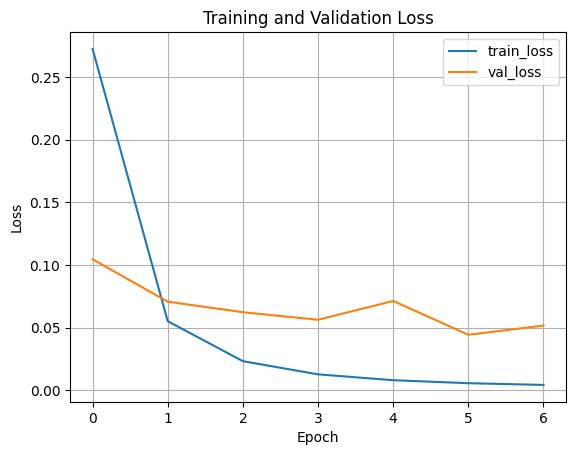

In [ ]:
##TASK 5: Transformers + Regularization
# Model amb -> embedding_dim = 256, num_heads = 4. Adam(learning_rate = 0.0005) i
# 3 blocs transformers

embedding_dim = 256
vocab_size = len(tokenizer.word_index) + 1

num_heads = 4  # Number of attention heads
ff_dim = 32

ff_dim_2 = 64

model = Sequential()
model.add(TokenAndPositionEmbedding(max_sequence_length,vocab_size,embedding_dim))
model.add(Dropout(0.2))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim))
model.add(Dropout(0.2))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim_2))
model.add(Dropout(0.1))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim_2))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu")) #layer 3
model.add(Dense(num_unique_entities, activation='softmax')) # output layer
model.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate = 0.0005), metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 7
history = model.fit(train_pad_sequences, train_labels_one_hot, epochs=epochs, batch_size=batch_size,
                    validation_data=(val_pad_sequences, val_labels_one_hot))

# Miramos F1 score macro sin tener en cuenta las predicciones en padding.
preds = model.predict(val_pad_sequences)
val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(preds, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

preds = model.predict(test_pad_sequences)
test_labels_idx = preds_to_index(test_labels_one_hot,len_test_sequences)
preds_idx = preds_to_index(preds, len_test_sequences)
print(classification_report(test_labels_idx, preds_idx, zero_division=1.0))

plot_training_curve(history)
print(model.summary())

**Task 6:** We try data balance

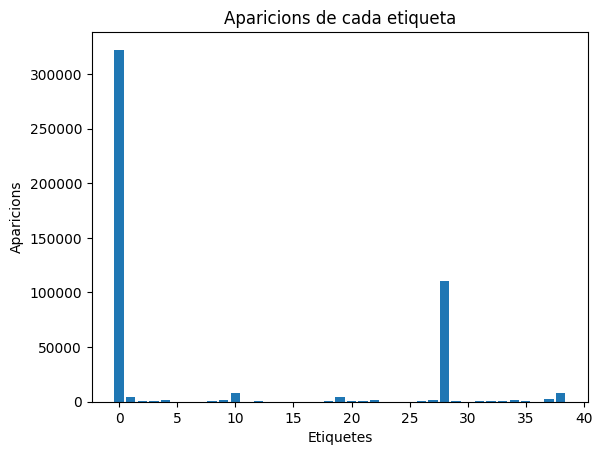

In [ ]:
# Analitzem el dataset
# Concatenate all NumPy arrays in the list
all_numbers = np.concatenate(train_pad_labels)
# Count the occurrences of each number
unique_numbers, counts = np.unique(all_numbers, return_counts=True)

# Create a bar plot
plt.bar(unique_numbers, counts)
plt.xlabel('Etiquetes')
plt.ylabel('Aparicions')
plt.title('Aparicions de cada etiqueta')
plt.show()

Veiem clarament com la classe 28 que representa la O está sobrerepresentada respecte totes les demés

In [ ]:

def compute_class_weights(train_numerical_labels,counts):
  class_weights = {}
  total = sum(counts)
  for i, count in enumerate(counts):
    class_weight = (total/(count*(num_unique_entities)))
    class_weights[i] = class_weight
  return class_weights

class_weights = compute_class_weights(train_pad_labels,counts)
print(class_weights)

{0: 0.037794563868635646, 1: 2.569512063182949, 2: 12.364961603540284, 3: 28.929898288568122, 4: 9.157509157509157, 5: 100.65691883873703, 6: 83.99646330680814, 7: 82.8536542822257, 8: 40.06410256410256, 9: 7.048314339981006, 10: 1.592089827383945, 11: 150.36403925292814, 12: 28.929898288568122, 13: 108.74542124542124, 14: 100.65691883873703, 15: 716.4404223227752, 16: 138.4032634032634, 17: 63.76694858370251, 18: 38.78817573085089, 19: 2.569512063182949, 20: 12.364961603540284, 21: 28.929898288568122, 22: 9.157509157509157, 23: 100.65691883873703, 24: 83.99646330680814, 25: 82.8536542822257, 26: 40.06410256410256, 27: 7.048314339981006, 28: 0.11054072099079859, 29: 13.267415228199543, 30: 811.965811965812, 31: 24.856096284667714, 32: 56.38651471984805, 33: 39.03681788297173, 34: 7.101741795619347, 35: 51.174315880198236, 36: 129.56901254773595, 37: 5.641263167895868, 38: 1.608915083155506}


Epoch 1/10
196/196 [==============================] - 25s 78ms/step - loss: 2.4585 - accuracy: 0.5288 - val_loss: 0.5768 - val_accuracy: 0.8395
Epoch 2/10
196/196 [==============================] - 10s 49ms/step - loss: 0.7356 - accuracy: 0.8594 - val_loss: 0.3344 - val_accuracy: 0.8964
Epoch 3/10
196/196 [==============================] - 8s 42ms/step - loss: 0.4164 - accuracy: 0.9178 - val_loss: 0.2971 - val_accuracy: 0.9186
Epoch 4/10
196/196 [==============================] - 8s 43ms/step - loss: 0.2530 - accuracy: 0.9342 - val_loss: 0.2021 - val_accuracy: 0.9438
Epoch 5/10
196/196 [==============================] - 8s 43ms/step - loss: 0.1494 - accuracy: 0.9555 - val_loss: 0.1903 - val_accuracy: 0.9465
Epoch 6/10
196/196 [==============================] - 8s 40ms/step - loss: 0.1228 - accuracy: 0.9545 - val_loss: 0.2134 - val_accuracy: 0.9404
Epoch 7/10
196/196 [==============================] - 9s 48ms/step - loss: 0.0992 - accuracy: 0.9590 - val_loss: 0.1541 - val_accuracy: 0.95

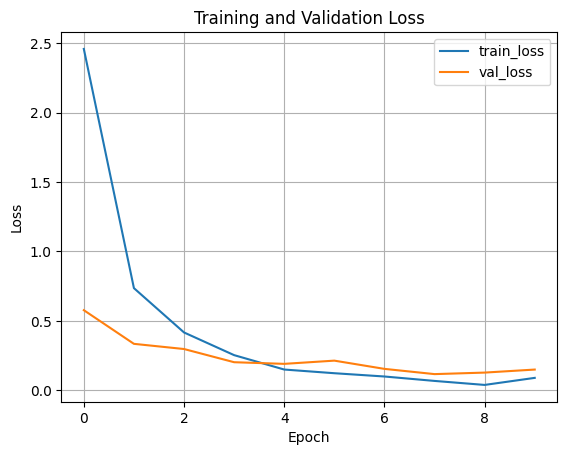

In [ ]:
##TASK 6: Transformers + Regularization + class_weights

embedding_dim = 256
vocab_size = len(tokenizer.word_index) + 1

num_heads = 4  # Number of attention heads
ff_dim = 32

ff_dim_2 = 64

model = Sequential()
model.add(TokenAndPositionEmbedding(max_sequence_length,vocab_size,embedding_dim))
model.add(Dropout(0.2))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim))
model.add(Dropout(0.2))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim_2))
model.add(Dropout(0.1))
model.add(TransformerBlock(embedding_dim, num_heads, ff_dim_2))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu")) #layer 3
model.add(Dense(num_unique_entities, activation='softmax')) # output layer
model.compile(loss='categorical_crossentropy',optimizer= Adam(learning_rate = 0.0005), metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 10
history = model.fit(train_pad_sequences, train_labels_one_hot, epochs=epochs, batch_size=batch_size,
                    validation_data=(val_pad_sequences, val_labels_one_hot),class_weight=class_weights)

# Miramos F1 score macro sin tener en cuenta las predicciones en padding.
preds = model.predict(val_pad_sequences)
val_labels_idx = preds_to_index(val_labels_one_hot,len_val_sequences)
preds_idx = preds_to_index(preds, len_val_sequences)
print(classification_report(val_labels_idx, preds_idx, zero_division=1.0))

preds = model.predict(test_pad_sequences)
test_labels_idx = preds_to_index(test_labels_one_hot,len_test_sequences)
preds_idx = preds_to_index(preds, len_test_sequences)
print(classification_report(test_labels_idx, preds_idx, zero_division=1.0))

plot_training_curve(history)
print(model.summary())

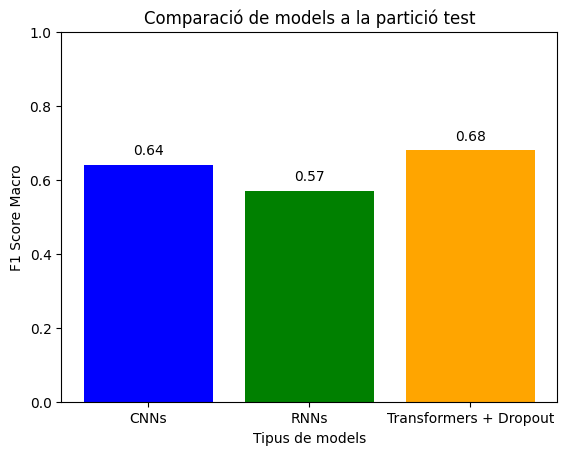

In [ ]:
# Prediccions a test F1-score Plot
import matplotlib.pyplot as plt

f1_scores = {'CNNs': 0.64, 'RNNs': 0.57, 'Transformers + Dropout': 0.68}

# Extracting class names and corresponding F1 scores
classes = list(f1_scores.keys())
scores = list(f1_scores.values())

# Creating a bar plot
plt.bar(classes, scores, color=['blue', 'green', 'orange','red'])
plt.xlabel('Tipus de models')
plt.ylabel('F1 Score Macro')
plt.title('Comparació de models a la partició test')
plt.ylim(0, 1)  # Adjust the y-axis limits if needed

# Display the F1 scores on top of the bars
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()